
# <p style="text-align: center;">MIS 382N: ADVANCED PREDICTIVE MODELING - MSBA</p>
# <p style="text-align: center;">Assignment 4</p>
## <p style="text-align: center;">Total points: 80 </p>
## <p style="text-align: center;">Due: November 9, submitted via Canvas by 11:59 pm</p>

Your homework should be written in a **Jupyter notebook**. You may work in groups of two if you wish. Your partner needs to be from the same section. Only one student per team needs to submit the assignment on Canvas.  But be sure to include name and UTEID for both students.  Homework groups will be created and managed through Canvas, so please do not arbitrarily change your homework group. If you do change, let the TA know. 

Also, please make sure your code runs and the graphics (and anything else) are displayed in your notebook before submitting. (%matplotlib inline)

### Name(s)
1. 
2. 

# Question 1 (20 pts) - Principal Component Analysis

Download dataset from [this link](https://drive.google.com/file/d/1U6FDSQQSUzvw3Ygtgp8I5ea0-dL-orSE/view?usp=sharing).


In this problem we will be applying PCA on the Lending Club loan dataset. A simplified version of the dataset with reduced number of samples. Please use the dataset in the above link. We will use reduced number of features and only two classes as shown below.

In [1]:
import os, sys, re
import time
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

# Load the csv file and fill Nan/empty values as 0
dataset = pd.read_csv('loan.csv')
df = dataset.fillna(0)

# We will be using only two classes and group them as below
def LoanResult(status):
    if (status == 'Fully Paid') or (status == 'Current'):
        return 1
    else:
        return 0

df['loan_status'] = df['loan_status'].apply(LoanResult)

# Set of features which indicate the dimensionality of the data
df = df[['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
             'emp_length', 'home_ownership','annual_inc', 'verification_status', 'loan_status',
             'purpose','addr_state', 'dti','open_acc', 'pub_rec', 'revol_bal', 'revol_util', 
             'initial_list_status', 'recoveries','collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
             'application_type', 'tot_coll_amt', 'tot_cur_bal', 'avg_cur_bal', 'chargeoff_within_12_mths',
             'pub_rec_bankruptcies', 'tax_liens', 'debt_settlement_flag']]

#For simplicity, in this question, we select all columns that do not contain integer of float type of data. Then, one hot encoding is performed.
df_cat = df.select_dtypes(exclude=['int64', 'float64'])
df = pd.get_dummies(df, df_cat.columns.values)

df.shape

# We select the `loan_status` column as the target column.  

/Users/alexmcgraw/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (123,124,125,128,129,130,133,139,140,141) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(226067, 161)

Use Principal Component Analysis (PCA) to solve this problem.  

* **1.1 (1 pt)** Perform the following steps to prepare the dataset:

    * Select the 'loan_status' column as the target column and the rest of the columns from the dataframe df as X. 

    * Split the dataset into train and test set with 25% data in test set and random_state = 42

    * Perform [Min-Max Scaling](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html) on the dataset. Remember that when we have training and testing data, we fit preprocessing parameters on training data and apply them to all testing data. You should scale only the features (independent variables), not the target variable y.
    
    Note: X should have 160 features.
    

* **1.2 (8 pts)** Use [PCA](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) and reduce the dimension of X to the following components: 100, 30, 10. For each of the three models, print the percentage(%) of variance captured by each of the compnonets and plot the scree plot the [scree plot]
(https://www.kindsonthegenius.com/principal-components-analysispca-in-python-step-by-step/).  (PCA should be fit only on X_train).


* **1.3 (5 pts)** Train LogisticRegression(random_state=4,max_iter=10000) with the full dimension X and each of the redued dimension X from PCA in the previous step (100, 30 and 10 dimensions). Print the classification reports for all the models -  this will print the class-wise Precision, Recall and F1 score. More details on classification report can be found [here](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html) (Note: you will be training logistic regression 4 times (160, 100, 30 and 10 dimensional X) and will print 4 classification reports)


* **1.4 (4 pts)** [Plot](https://scikit-learn.org/stable/auto_examples/miscellaneous/plot_roc_curve_visualization_api.html#sphx-glr-auto-examples-miscellaneous-plot-roc-curve-visualization-api-py) the ROC curves for all models (trained using dataset containing all dimensions and dataset containing reduced dimensions, total 4 models). ROC curve is used to study the classifier's output. Details on ROC can be found [here](https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html).


* **1.5 (2 pts)** What do you observe from the ROC curves? 

# ANSWER

### 1.1

In [2]:
from sklearn.preprocessing import MinMaxScaler


X = df.drop(['loan_status'],axis=1).values
y = df['loan_status'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

scaler = MinMaxScaler()
scaler.fit_transform(X_train)
scaler.transform(X_test)


X.shape

(226067, 160)

### 1.2

In [3]:
from sklearn.decomposition import PCA

pca_100 = PCA(n_components=100)
pca_100_fitted = pca_100.fit(X_train)

print(pca_100_fitted.explained_variance_ratio_)


[7.80366018e-01 1.99070433e-01 1.16229685e-02 6.31176538e-03
 2.32122320e-03 2.48447958e-04 5.88665620e-05 2.38616734e-07
 1.39947649e-08 1.10979403e-08 9.74776774e-09 1.84109622e-09
 6.11082175e-10 5.26982208e-10 1.01716595e-11 9.38189462e-12
 8.57247667e-12 8.12095713e-12 6.50370350e-12 5.85047744e-12
 5.59551858e-12 5.50000125e-12 4.72851851e-12 4.59352712e-12
 3.72658228e-12 2.98535624e-12 2.70422170e-12 2.68856964e-12
 2.58842579e-12 2.13018713e-12 2.05638664e-12 2.00181645e-12
 1.96191641e-12 1.95420391e-12 1.81805797e-12 1.77221112e-12
 1.63702236e-12 1.62343564e-12 1.59985572e-12 1.55523052e-12
 1.53725302e-12 1.42195118e-12 1.39869450e-12 1.37862123e-12
 1.36673933e-12 1.34339100e-12 1.33536322e-12 1.26878298e-12
 1.19908351e-12 1.17849748e-12 1.17234256e-12 1.16251718e-12
 1.11728788e-12 9.84404470e-13 9.49600990e-13 8.93209413e-13
 8.55204644e-13 8.28741241e-13 8.26984084e-13 8.12162817e-13
 7.57445728e-13 7.53254116e-13 6.75253881e-13 6.58168361e-13
 6.53005558e-13 6.313078

In [4]:
# Create a Dataframe with the 100 features resulting from PCA_100

principalComponents_100 = pca_100.fit_transform(X)
principalComponents_100

principal_Dataframe_100 = pd.DataFrame(data = principalComponents_100)

In [5]:
principal_Dataframe_100

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,-133736.468394,4605.874123,-11282.472023,16512.825488,-1484.079331,-108.641954,-245.233032,-24.780378,27.528490,-4.190793,...,0.002755,-0.005216,-0.009731,-0.000327,-0.003329,-0.004939,0.000226,0.004314,0.007197,-0.005345
1,172868.074056,-33712.436801,-5412.239982,-23338.021173,-5643.000860,-1064.478355,1026.360883,-52.888122,12.635295,-1.376135,...,-0.128743,0.006510,-0.002769,-0.002573,-0.080024,-0.005760,-0.047508,-0.008142,0.000600,-0.004323
2,-41068.502772,-13893.686630,-16101.792659,12408.621661,6458.500768,-221.936578,-227.111699,8.670707,24.190148,-4.313561,...,-0.011247,-0.006508,-0.014716,0.003038,-0.011051,-0.005974,-0.004931,0.002985,0.011784,-0.002477
3,155733.873692,-29005.100003,-28448.576905,15434.777159,1190.663923,-294.207589,440.191980,8.263289,-37.295553,-1.749040,...,-0.012593,-0.006224,-0.014077,0.002910,-0.014646,-0.008560,-0.008009,0.005899,0.013339,-0.005689
4,-35653.115288,-16136.866909,-2575.138039,-28632.298085,-3547.023062,-1047.516298,-192.831068,-102.468657,29.811804,-1.605749,...,-0.013399,-0.002707,-0.013095,-0.001210,-0.013770,0.000780,-0.010836,-0.001003,-0.003012,-0.001492
5,541546.192567,-60457.193079,-5761.382533,33811.681102,-17386.669268,-289.143769,-191.281625,16.546744,-5.111177,-2.318786,...,-0.012970,0.003095,-0.011854,-0.004716,-0.018006,-0.014028,-0.007981,0.008546,0.003388,0.001086
6,-150555.853518,4478.688009,-14505.003183,15591.412745,-1571.859379,-102.907816,-254.646192,-24.227086,39.432792,-5.093289,...,-0.003834,-0.007322,-0.009824,0.005469,-0.006433,-0.006452,-0.001818,0.007140,0.011306,-0.002848
7,-56769.551160,-2783.177335,17812.386387,24079.775463,-1019.272482,-73.961900,-168.284179,-0.565761,-20.325613,-2.139989,...,-0.018047,0.002935,-0.008971,-0.001861,-0.020696,-0.012370,-0.007557,0.007878,0.007266,-0.003326
8,-109329.246912,-2661.054554,-7843.236317,13842.850339,-19.809404,-152.350723,-229.264735,5.852561,5.137521,-3.429755,...,-0.005800,-0.006132,-0.012422,0.001565,-0.006611,-0.004003,-0.002953,0.006012,0.009901,-0.003012
9,250243.380756,164057.826255,19601.401289,38888.036162,-16130.726104,-94.391670,-178.744982,-2.733100,2.031138,-3.217656,...,-0.017973,-0.004328,-0.019656,-0.007756,-0.015004,-0.000913,-0.013882,0.006129,0.003826,0.001382


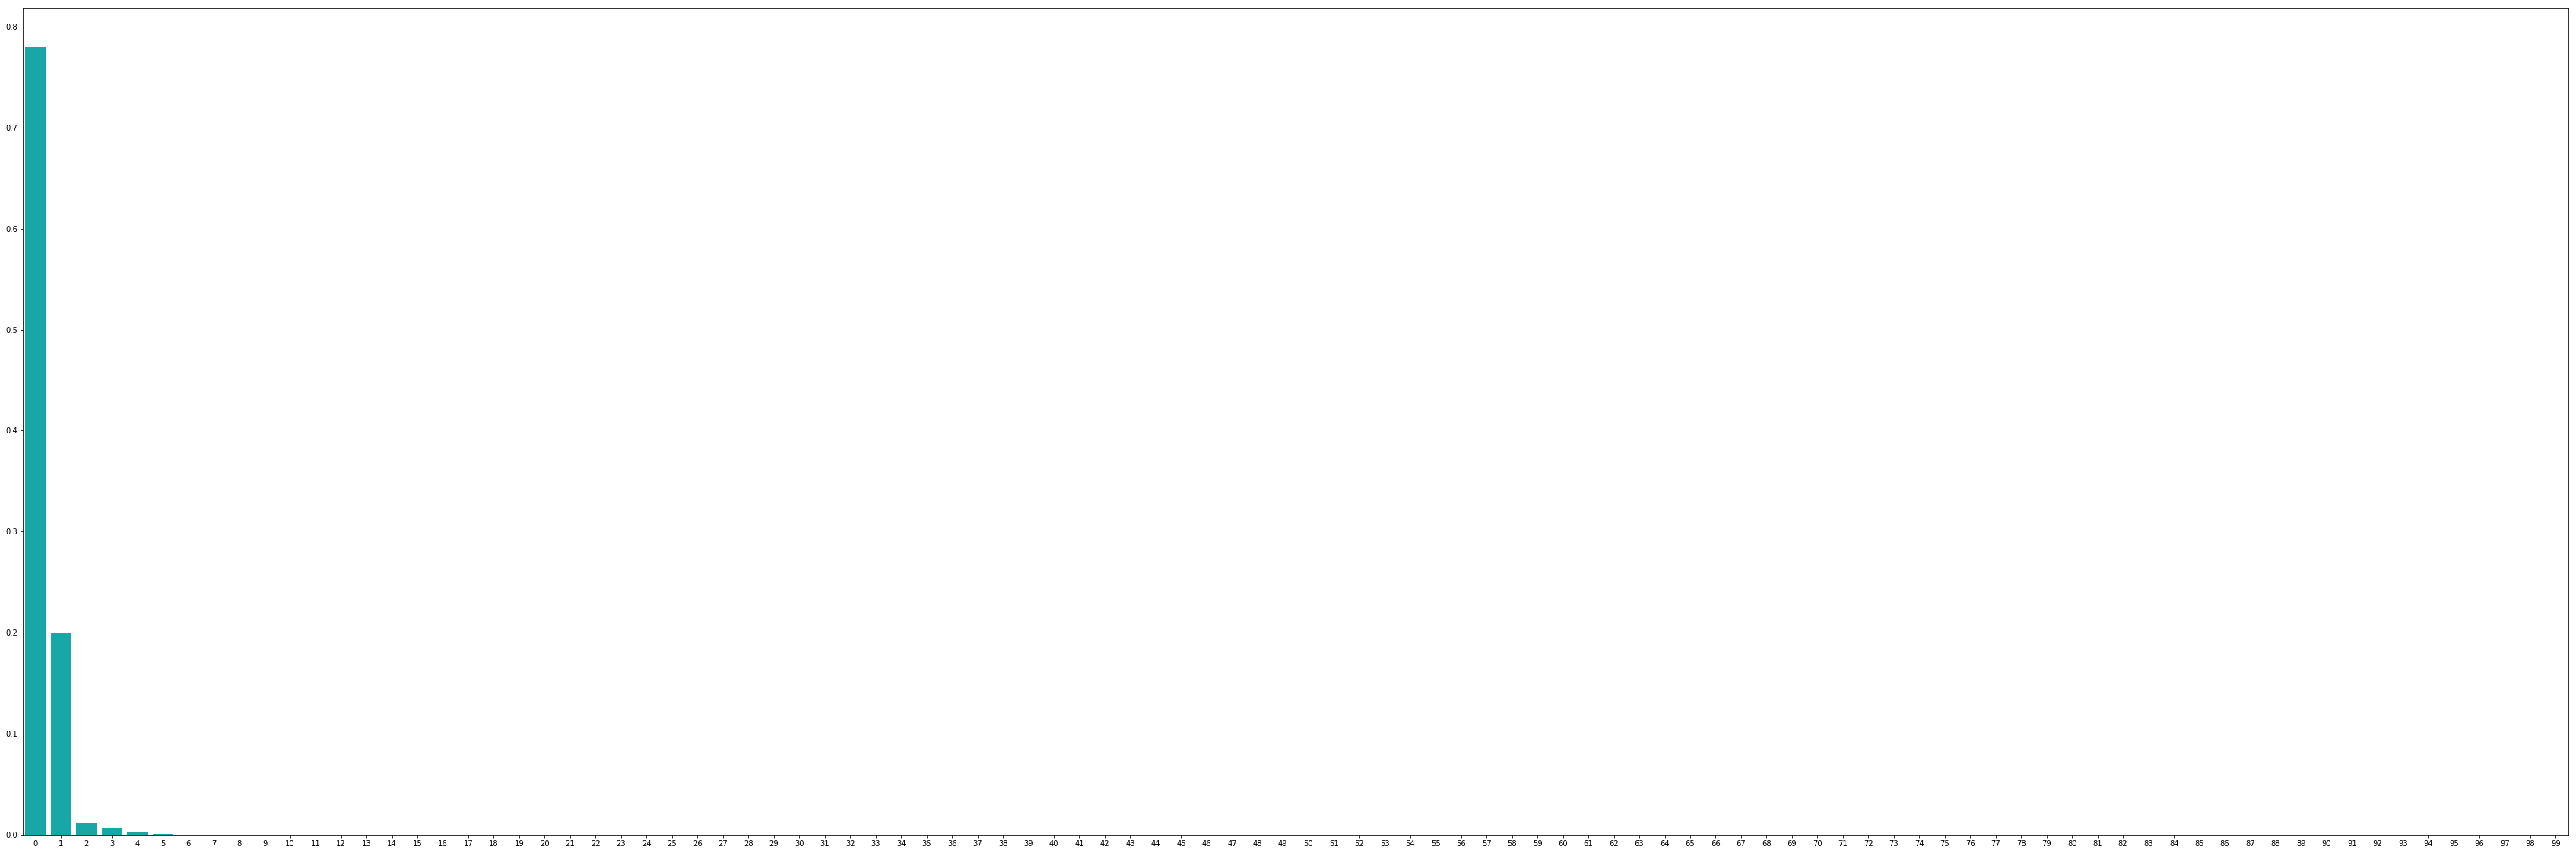

In [7]:
from matplotlib import pyplot as plt
import seaborn as sns

# Scree Plot_100 features with PCA

# Create list of columns from Dataframe

cols_100_list = principal_Dataframe_100.columns.to_list()

columns = cols_100_list

Var_explained_df_100 = pd.DataFrame(pca_100_fitted.explained_variance_ratio_)


plt.figure(figsize=(60, 20))

sns.barplot(x=columns,y=pca_100_fitted.explained_variance_ratio_, 
           data=Var_explained_df_100, color="c");

In [7]:
pca_30 = PCA(n_components=30)
pca_30_fitted = pca_30.fit(X_train)

print(pca_30_fitted.explained_variance_ratio_)

[7.80366018e-01 1.99070433e-01 1.16229685e-02 6.31176538e-03
 2.32122320e-03 2.48447958e-04 5.88665620e-05 2.38616734e-07
 1.39947649e-08 1.10979403e-08 9.74776774e-09 1.84109622e-09
 6.11082175e-10 5.26982208e-10 1.01716567e-11 9.38189368e-12
 8.57247100e-12 8.12095373e-12 6.50369870e-12 5.85043119e-12
 5.59545905e-12 5.49993622e-12 4.72804453e-12 4.59316614e-12
 3.72323199e-12 2.97910902e-12 2.70049932e-12 2.65245809e-12
 2.57098027e-12 2.08380094e-12]


In [8]:
# Create a Dataframe with the 30 features resulting from PCA_30

principalComponents_30 = pca_30.fit_transform(X)
principalComponents_30

principal_Dataframe_30 = pd.DataFrame(data = principalComponents_30)

In [9]:
principal_Dataframe_30

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,-133736.468394,4605.874123,-11282.472023,16512.825488,-1484.079331,-108.641954,-245.233032,-24.780378,27.528490,-4.190793,...,1.119395,-0.154112,-0.233061,-0.204433,-0.057054,0.539048,-0.178362,-0.058170,-0.008123,0.048494
1,172868.074056,-33712.436801,-5412.239982,-23338.021173,-5643.000860,-1064.478355,1026.360883,-52.888122,12.635295,-1.376135,...,1.175650,0.518946,-0.166590,-0.004042,-0.004500,0.226253,-0.501732,0.207125,0.104141,0.014591
2,-41068.502772,-13893.686630,-16101.792659,12408.621661,6458.500768,-221.936578,-227.111699,8.670707,24.190148,-4.313561,...,-0.338443,0.503923,-0.005144,-0.210190,-0.229815,-0.007815,-0.597868,0.297874,0.007534,-0.006209
3,155733.873692,-29005.100003,-28448.576905,15434.777159,1190.663923,-294.207589,440.191980,8.263289,-37.295553,-1.749040,...,-0.056919,-0.131704,-0.169309,-0.191297,-0.026340,0.063708,-0.536379,0.112555,0.025408,0.026129
4,-35653.115288,-16136.866909,-2575.138039,-28632.298085,-3547.023062,-1047.516298,-192.831068,-102.468657,29.811804,-1.605749,...,-0.384632,0.016915,0.023733,-0.188732,-0.242973,0.051991,0.032743,0.025160,0.054239,-0.009917
5,541546.192567,-60457.193079,-5761.382533,33811.681102,-17386.669268,-289.143769,-191.281625,16.546744,-5.111177,-2.318786,...,-0.139794,-0.261071,-0.084890,-0.352751,-0.014048,0.245124,-0.020821,0.116658,0.127942,0.110825
6,-150555.853518,4478.688009,-14505.003183,15591.412745,-1571.859379,-102.907816,-254.646192,-24.227086,39.432792,-5.093289,...,-0.121362,0.099740,-0.127293,-0.236612,-0.182275,0.190669,-0.619654,0.251698,0.012145,-0.037837
7,-56769.551160,-2783.177335,17812.386387,24079.775463,-1019.272482,-73.961900,-168.284179,-0.565761,-20.325613,-2.139989,...,-0.040689,-0.654541,-0.227670,-0.280850,-0.057708,0.188520,-0.108540,0.104552,0.078896,-0.055332
8,-109329.246912,-2661.054554,-7843.236317,13842.850339,-19.809404,-152.350723,-229.264735,5.852561,5.137521,-3.429755,...,-0.179482,-0.046789,-0.112117,-0.218326,-0.203715,0.092693,-0.639352,0.213214,0.074020,-0.238694
9,250243.380756,164057.826255,19601.401289,38888.036162,-16130.726104,-94.391670,-178.744982,-2.733100,2.031138,-3.217656,...,-0.419330,0.268384,-0.043088,-0.268282,1.098111,-0.127821,-0.173239,-0.436575,0.661181,0.135740


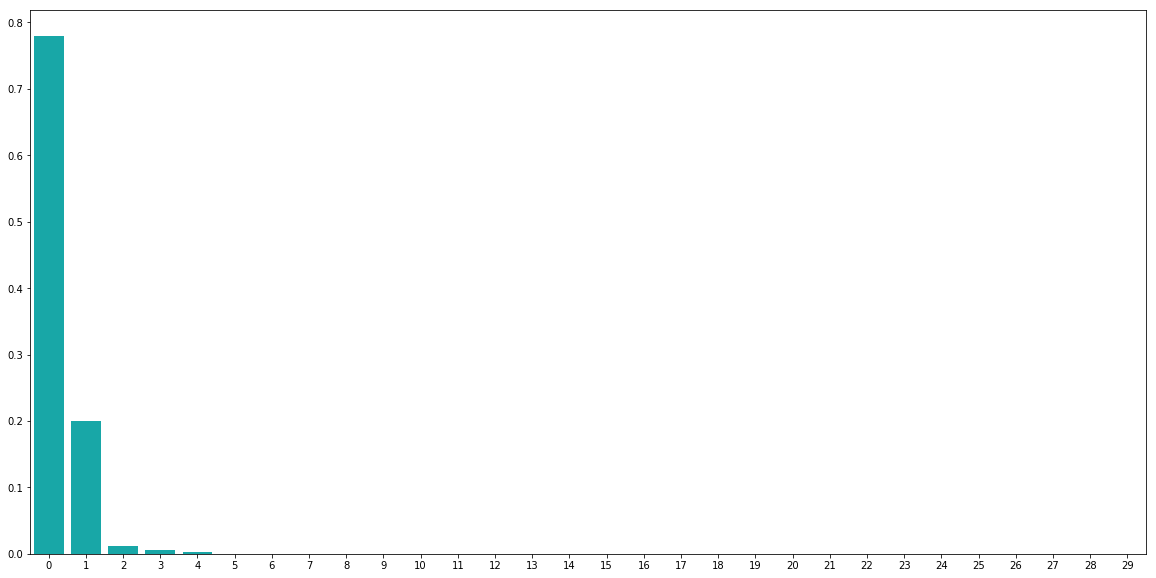

In [10]:
from matplotlib import pyplot as plt
import seaborn as sns

# Scree Plot_100 features with PCA

# Create list of columns from Dataframe

cols_30_list = principal_Dataframe_30.columns.to_list()

columns = cols_30_list

Var_explained_df_30 = pd.DataFrame(pca_30_fitted.explained_variance_ratio_)


plt.figure(figsize=(20, 10))

sns.barplot(x=columns,y=pca_30_fitted.explained_variance_ratio_, 
           data=Var_explained_df_30, color="c");

In [11]:
# Create a Dataframe with the 10 features resulting from PCA_10

pca_10 = PCA(n_components=10)
pca_10_fitted = pca_10.fit(X_train)

print(pca_10_fitted.explained_variance_ratio_)

[7.80366018e-01 1.99070433e-01 1.16229685e-02 6.31176538e-03
 2.32122320e-03 2.48447958e-04 5.88665620e-05 2.38616734e-07
 1.39947649e-08 1.10979403e-08]


In [12]:
principalComponents_10 = pca_10.fit_transform(X)
principalComponents_10

principal_Dataframe_10 = pd.DataFrame(data = principalComponents_10)

In [13]:
principal_Dataframe_10

,0,1,2,3,4,5,6,7,8,9
0,-133736.468394,4605.874123,-11282.472023,16512.825488,-1484.079331,-108.641954,-245.233032,-24.780378,27.528490,-4.190793
1,172868.074056,-33712.436801,-5412.239982,-23338.021173,-5643.000860,-1064.478355,1026.360883,-52.888122,12.635295,-1.376135
2,-41068.502772,-13893.686630,-16101.792659,12408.621661,6458.500768,-221.936578,-227.111699,8.670707,24.190148,-4.313561
3,155733.873692,-29005.100003,-28448.576905,15434.777159,1190.663923,-294.207589,440.191980,8.263289,-37.295553,-1.749040
4,-35653.115288,-16136.866909,-2575.138039,-28632.298085,-3547.023062,-1047.516298,-192.831068,-102.468657,29.811804,-1.605749
5,541546.192567,-60457.193079,-5761.382533,33811.681102,-17386.669268,-289.143769,-191.281625,16.546744,-5.111177,-2.318786
6,-150555.853518,4478.688009,-14505.003183,15591.412745,-1571.859379,-102.907816,-254.646192,-24.227086,39.432792,-5.093289
7,-56769.551160,-2783.177335,17812.386387,24079.775463,-1019.272482,-73.961900,-168.284179,-0.565761,-20.325613,-2.139989
8,-109329.246912,-2661.054554,-7843.236317,13842.850339,-19.809404,-152.350723,-229.264735,5.852561,5.137521,-3.429755
9,250243.380756,164057.826255,19601.401289,38888.036162,-16130.726104,-94.391670,-178.744982,-2.733100,2.031138,-3.217656


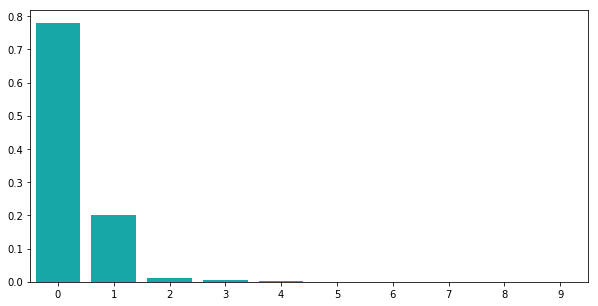

In [14]:
from matplotlib import pyplot as plt
import seaborn as sns

# Scree Plot_100 features with PCA

# Create list of columns from Dataframe

cols_10_list = principal_Dataframe_10.columns.to_list()

columns = cols_10_list

Var_explained_df_10 = pd.DataFrame(pca_10_fitted.explained_variance_ratio_)


plt.figure(figsize=(10, 5))

sns.barplot(x=columns,y=pca_10_fitted.explained_variance_ratio_, 
           data=Var_explained_df_10, color="c");

In [15]:
# Prepare Plot

import matplotlib.pyplot as plt


# Combine features and target for each PCA 

target = df[['loan_status']]

pca_100_df = pd.concat([principal_Dataframe_100, target],axis = 1)

pca_30_df = pd.concat([principal_Dataframe_30, target],axis = 1)

pca_10_df = pd.concat([principal_Dataframe_10, target],axis = 1)



### 1.3

1.3 (5 pts) Train LogisticRegression(random_state=4,max_iter=10000) with the full dimension X and each of the redued dimension X from PCA in the previous step (100, 30 and 10 dimensions). Print the classification reports for all the models - this will print the class-wise Precision, Recall and F1 score. More details on classification report can be found here (Note: you will be training logistic regression 4 times (160, 100, 30 and 10 dimensional X) and will print 4 classification reports)

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report


# Full dimension X

logisticRegr = LogisticRegression(random_state=4,max_iter=10000)

log_reg_full = logisticRegr.fit(X_train, y_train)
log_pred_full = logisticRegr.predict(X_test)

target_names = ['Fully Paid','Current'] 

print(classification_report(y_test, log_pred_full, target_names=target_names))


              precision    recall  f1-score   support

  Fully Paid       0.29      0.00      0.00       850
     Current       0.98      1.00      0.99     55667

    accuracy                           0.98     56517
   macro avg       0.64      0.50      0.50     56517
weighted avg       0.97      0.98      0.98     56517



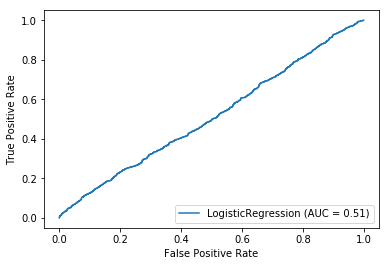

In [17]:
from sklearn.metrics import plot_roc_curve

log_reg_full_plot = plot_roc_curve(log_reg_full, X_test, y_test)

plt.show()

In [18]:
# X reduced to 100 features with PCA 

X = principal_Dataframe_100

X_train, X_test, y_train, y_test = train_test_split(principal_Dataframe_100, y, test_size=0.25, random_state=42)


log_reg_100 = logisticRegr.fit(X_train, y_train)
log_pred_100 = logisticRegr.predict(X_test)

target_names = ['Fully Paid','Current'] 

print(classification_report(y_test, log_pred_100, target_names=target_names))

              precision    recall  f1-score   support

  Fully Paid       0.02      0.62      0.03       850
     Current       0.99      0.43      0.60     55667

    accuracy                           0.44     56517
   macro avg       0.50      0.53      0.32     56517
weighted avg       0.97      0.44      0.59     56517



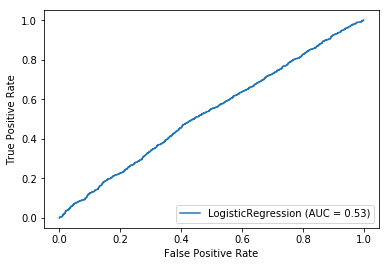

In [19]:
log_reg_100_plot = plot_roc_curve(log_reg_100, X_test, y_test)

plt.show()

In [20]:
# X reduced to 30 features with PCA 
 

X = principalComponents_30


log_reg_30 = logisticRegr.fit(X_train, y_train)
log_pred_30 = logisticRegr.predict(X_test)

target_names = ['Fully Paid','Current'] 

print(classification_report(y_test, log_pred_30, target_names=target_names))




              precision    recall  f1-score   support

  Fully Paid       0.02      0.62      0.03       850
     Current       0.99      0.43      0.60     55667

    accuracy                           0.44     56517
   macro avg       0.50      0.53      0.32     56517
weighted avg       0.97      0.44      0.59     56517



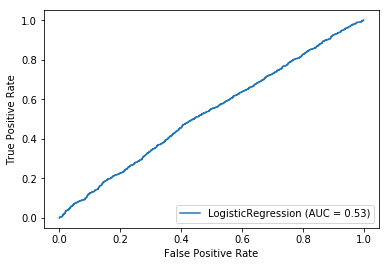

In [21]:
log_reg_30_plot = plot_roc_curve(log_reg_30, X_test, y_test)

plt.show()

In [22]:
# X reduced to 10 features with PCA 
 

X = principalComponents_10

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

log_reg_10 = logisticRegr.fit(X_train, y_train)
log_pred_10 = logisticRegr.predict(X_test)

target_names = ['Fully Paid','Current'] 

print(classification_report(y_test, log_pred_10, target_names=target_names))


              precision    recall  f1-score   support

  Fully Paid       0.02      0.62      0.03       850
     Current       0.99      0.43      0.60     55667

    accuracy                           0.44     56517
   macro avg       0.50      0.53      0.32     56517
weighted avg       0.97      0.44      0.59     56517



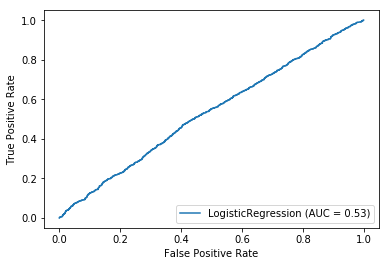

In [23]:
log_reg_10_plot = plot_roc_curve(log_reg_10, X_test, y_test)

plt.show()

### 1.4

# Done below each model

### 1.5


When using 100 or less features after performing PCA, the ROC curve is identical. It means that the rate of TP and FP are unchanged. 

# Question 2 (20 pts)- Decision Tree Classifier
Download dataset from [this link](https://drive.google.com/file/d/1iWh0gF2bXOYSnuq843qLxnFphT1HN-lq/view?usp=sharing).

**Customer Eligibility for Deposits**

We will build a Decision Tree classification model to predict if a customer will subscribe or no (yes/no).

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn import datasets
from io import StringIO
from sklearn.tree import export_graphviz
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn import metrics
%matplotlib inline

In [25]:
# Loading the data file
bank=pd.read_csv('bank.csv')
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


Input variables:
# bank client data:
1 - `age` (numeric)

2 - `job` : type of job (categorical: 'admin', 'blue-collar', 'entrepreneur', 'housemaid', 'management', 'retired', 'self-employed', 'services', 'student', 'technician', 'unemployed', 'unknown')

3 - `marital` : marital status (categorical: 'divorced','married','single'; note: 'divorced' means divorced or widowed)

4 - `education` (categorical: 'primary', 'secondary','tertiary')

5 - `default`: has credit in default? (categorical: 'no','yes','unknown')

6 - `balance`: account balance

7 - `housing`: has housing loan? (categorical: 'no','yes','unknown')

8 - `loan`: has personal loan? (categorical: 'no','yes','unknown')

# related with the last contact of the current campaign:
9 - `contact`: contact communication type (categorical: 'cellular','telephone')

10 - `day_of_month` : 1,2....31

11 - `month`: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')

12 - `duration`: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
# other attributes:
13 - `campaign`: number of contacts performed during this campaign and for this client (numeric, includes last contact)

14 - `pdays`: number of days that passed by after the client was last contacted from a previous campaign (numeric; 10000 means client was not previously contacted)

15 - `previous`: number of contacts performed before this campaign and for this client (numeric)

16 - `poutcome`: outcome of the previous marketing campaign (categorical: 'failure','other','success','unknown')

# Output variable (desired target):
17 - `y` - has the client subscribed a term deposit? (binary: 'yes','no')

**All pre-processing is done where categorical variables are converted to numeric values and unnecessary columns are dropped.**

In [28]:
# Make a copy for parsing
bank_data = bank.copy()

# Drop 'contact', as every participant has been contacted. 
bank_data.drop('contact', axis=1, inplace=True)
# Drop 'month' and 'day' as they don't have any intrinsic meaning
bank_data.drop('month', axis=1, inplace=True)
bank_data.drop('day', axis=1, inplace=True)

#Convert categorical values to numeric values
# values for "default" : yes/no
bank_data["default"]
bank_data['default_cat'] = bank_data['default'].map( {'yes':1, 'no':0} )
bank_data.drop('default', axis=1,inplace = True)
# values for "housing" : yes/no
bank_data["housing_cat"]=bank_data['housing'].map({'yes':1, 'no':0})
bank_data.drop('housing', axis=1,inplace = True)
# values for "loan" : yes/no
bank_data["loan_cat"] = bank_data['loan'].map({'yes':1, 'no':0})
bank_data.drop('loan', axis=1, inplace=True)
# values for "deposit" : yes/no
bank_data["deposit_cat"] = bank_data['deposit'].map({'yes':1, 'no':0})
bank_data.drop('deposit', axis=1, inplace=True)

# Convert categorical variables to dummies
bank_data = pd.get_dummies(data=bank_data, columns = ['job', 'marital', 'education', 'poutcome'], \
                                   prefix = ['job', 'marital', 'education', 'poutcome'])

# Convert p_days to a probability value
bank_data['recent_pdays'] = np.where(bank_data['pdays'], 1/bank_data.pdays, 1/bank_data.pdays)
# Drop 'pdays'
bank_data.drop('pdays', axis=1, inplace = True)

In [29]:
bank_data.head()

,age,balance,duration,campaign,previous,default_cat,housing_cat,loan_cat,deposit_cat,job_admin.,...,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,recent_pdays
0,59,2343,1042,1,0,0,1,0,1,1,...,0,0,1,0,0,0,0,0,1,-1.0
1,56,45,1467,1,0,0,0,0,1,1,...,0,0,1,0,0,0,0,0,1,-1.0
2,41,1270,1389,1,0,0,1,0,1,0,...,0,0,1,0,0,0,0,0,1,-1.0
3,55,2476,579,1,0,0,1,0,1,0,...,0,0,1,0,0,0,0,0,1,-1.0
4,54,184,673,2,0,0,0,0,1,1,...,0,0,0,1,0,0,0,0,1,-1.0


In [30]:
# Splitting the data into training and test data with 80:20 ratio with random_state=50.
# Building the data model
# Train-Test split: 20% test data
X = bank_data.drop('deposit_cat', 1)
Y = bank_data.deposit_cat
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 50)

a. **(8 pts)** Build a decision tree with depths 2,5,10,20 and max depth using gini and entropy criterion; report the train and test error. Refer [Decisison Tree](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier) for more information on how to implement using sklearn.

b. **(2 pts)** Explain how the train and test accuracy varies as we increase the depth of the tree.

c. **(4 pts)** List the most important features for the tree with depth=2 and criterion=gini and plot the tree. Name this tree model as `dt2`.

d. **(6 pts)** Report the accuracy and AUC for the test data and plot the ROC curve using `dt2`.


# Answer 2
## (a)

In [36]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Max depth Decision tree classifier using gini classifier 


clf_gini_max = DecisionTreeClassifier(random_state=50, criterion='gini', max_depth=None)


clf_gini_max = clf_gini_max.fit(X_train,Y_train)
Y_pred = clf_gini_max.predict(X_test)

accuracy_training = clf_gini_max.score(X_train,Y_train)
accuracy_testing = clf_gini_max.score(X_test,Y_test)

train_error = 1 - accuracy_training
test_error = 1 - accuracy_testing

print('Train Error:', train_error)
print('Test Error:', test_error)

Train Error: 0.0
Test Error: 0.2660098522167488


In [37]:
# Max depth Decision tree classifier using entropy criterion

clf_entropy_max = DecisionTreeClassifier(random_state=50, criterion='entropy', max_depth=None)


clf_entropy_max = clf_entropy_max.fit(X_train,Y_train)
Y_pred = clf_entropy_max.predict(X_test)

accuracy_training = clf_entropy_max.score(X_train,Y_train)
accuracy_testing = clf_entropy_max.score(X_test,Y_test)

train_error = 1 - accuracy_training
test_error = 1 - accuracy_testing

print(train_error)
print(test_error)

0.0
0.2678011643528885


In [38]:
# 2 depth Decision tree classifier using gini classifier 


clf_gini_2 = DecisionTreeClassifier(random_state=50, criterion='gini', max_depth=2)


clf_gini_2 = clf_gini_2.fit(X_train,Y_train)
Y_pred = clf_gini_2.predict(X_test)

accuracy_training = clf_gini_2.score(X_train,Y_train)
accuracy_testing = clf_gini_2.score(X_test,Y_test)

train_error = 1 - accuracy_training
test_error = 1 - accuracy_testing

print(train_error)
print(test_error)

0.2714749692014783
0.2731751007613077


In [39]:
# 2 depth Decision tree classifier using entropy classifier 


clf_entropy_2 = DecisionTreeClassifier(random_state=50, criterion='entropy', max_depth=2)


clf_entropy_2 = clf_entropy_2.fit(X_train,Y_train)
Y_pred = clf_entropy_2.predict(X_test)

accuracy_training = clf_entropy_2.score(X_train,Y_train)
accuracy_testing = clf_entropy_2.score(X_test,Y_test)

train_error = 1 - accuracy_training
test_error = 1 - accuracy_testing

print(train_error)
print(test_error)

0.2880501735916676
0.2910882221227049


In [40]:
# 5 depth Decision tree classifier using gini classifier 


clf_gini_5 = DecisionTreeClassifier(random_state=50, criterion='gini', max_depth=5)


clf_gini_5 = clf_gini_5.fit(X_train,Y_train)
Y_pred = clf_gini_5.predict(X_test)

accuracy_training = clf_gini_5.score(X_train,Y_train)
accuracy_testing = clf_gini_5.score(X_test,Y_test)

train_error = 1 - accuracy_training
test_error = 1 - accuracy_testing

print(train_error)
print(test_error)

0.20237428603427032
0.22391401701746527


In [41]:
# 5 depth Decision tree classifier using entropy classifier 

clf_entropy_5 = DecisionTreeClassifier(random_state=50, criterion='entropy', max_depth=5)


clf_entropy_5 = clf_entropy_5.fit(X_train,Y_train)
Y_pred = clf_entropy_5.predict(X_test)

accuracy_training = clf_entropy_5.score(X_train,Y_train)
accuracy_testing = clf_entropy_5.score(X_test,Y_test)

train_error = 1 - accuracy_training
test_error = 1 - accuracy_testing

print(train_error)
print(test_error)

0.20013439354910967
0.2216748768472906


In [42]:
# 10 depth Decision tree classifier using gini classifier 


clf_gini_10 = DecisionTreeClassifier(random_state=50, criterion='gini', max_depth=10)


clf_gini_10 = clf_gini_10.fit(X_train,Y_train)
Y_pred = clf_gini_10.predict(X_test)

accuracy_training = clf_gini_10.score(X_train,Y_train)
accuracy_testing = clf_gini_10.score(X_test,Y_test)

train_error = 1 - accuracy_training
test_error = 1 - accuracy_testing

print(train_error)
print(test_error)

0.1366334415948034
0.21092700403045228


In [43]:
# 10 depth Decision tree classifier using entropy classifier 


clf_entropy_10 = DecisionTreeClassifier(random_state=50, criterion='entropy', max_depth=10)


clf_entropy_10 = clf_entropy_10.fit(X_train,Y_train)
Y_pred = clf_entropy_10.predict(X_test)

accuracy_training = clf_entropy_10.score(X_train,Y_train)
accuracy_testing = clf_entropy_10.score(X_test,Y_test)

train_error = 1 - accuracy_training
test_error = 1 - accuracy_testing

print(train_error)
print(test_error)

0.1498488072572517
0.20824003582624273


In [44]:
# 20 depth Decision tree classifier using gini classifier 


clf_gini_20 = DecisionTreeClassifier(random_state=50, criterion='gini', max_depth=20)


clf_gini_20 = clf_gini_20.fit(X_train,Y_train)
Y_pred = clf_gini_20.predict(X_test)

accuracy_training = clf_gini_20.score(X_train,Y_train)
accuracy_testing = clf_gini_20.score(X_test,Y_test)

train_error = 1 - accuracy_training
test_error = 1 - accuracy_testing

print(train_error)
print(test_error)

0.015791242020383067
0.2561576354679803


In [45]:
# 20 depth Decision tree classifier using entropy classifier 


clf_entropy_20 = DecisionTreeClassifier(random_state=50, criterion='entropy', max_depth=20)


clf_entropy_20 = clf_entropy_20.fit(X_train,Y_train)
Y_pred = clf_entropy_20.predict(X_test)

accuracy_training = clf_entropy_20.score(X_train,Y_train)
accuracy_testing = clf_entropy_20.score(X_test,Y_test)

train_error = 1 - accuracy_training
test_error = 1 - accuracy_testing

print(train_error)
print(test_error)

0.03494232276850706
0.2615315718763994


## (b) Explain how the train and test accuracy varies as we increase the depth of the tree.



As the depth increases, the training accuracy increases with each increase in depth. The testing accuracy starts to increase, but reaches its best accuracy at the depth of 10, but then decreases accuracy when we train the depth of 20. This is because of overfitting the model to the training sets; increaes in bias. 

# (c) List the most important features for the tree with depth=2 and criterion=gini and plot the tree. Name this tree model as `dt2`.


{'duration': 0.849306123902405, 'poutcome_success': 0.15069387609759496}


[Text(279.0, 453.0, 'X[2] <= 206.5\ngini = 0.499\nsamples = 8929\nvalue = [4700, 4229]'),
 Text(139.5, 271.8, 'X[29] <= 0.5\ngini = 0.327\nsamples = 3612\nvalue = [2867, 745]'),
 Text(69.75, 90.59999999999997, 'gini = 0.273\nsamples = 3380\nvalue = [2828, 552]'),
 Text(209.25, 90.59999999999997, 'gini = 0.28\nsamples = 232\nvalue = [39, 193]'),
 Text(418.5, 271.8, 'X[2] <= 441.5\ngini = 0.452\nsamples = 5317\nvalue = [1833, 3484]'),
 Text(348.75, 90.59999999999997, 'gini = 0.5\nsamples = 2762\nvalue = [1340, 1422]'),
 Text(488.25, 90.59999999999997, 'gini = 0.311\nsamples = 2555\nvalue = [493, 2062]')]

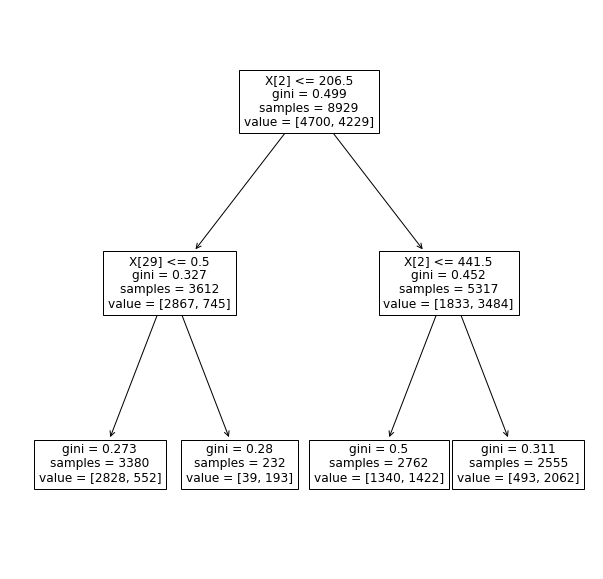

In [46]:
# 2 depth Decision tree classifier using gini classifier 

# dt2 

dt_2 = DecisionTreeClassifier(random_state=50, criterion='gini', max_depth=2)


dt_2 = dt_2.fit(X_train,Y_train)
Y_pred = dt_2.predict(X_test)

accuracy_training = dt_2.score(X_train,Y_train)
accuracy_testing = dt_2.score(X_test,Y_test)

# Print the 2 most important features

d = dict(zip(X_train.columns, dt_2.feature_importances_))
d = dict((k, v) for k, v in d.items() if v >= 0.00001)
print(d)


# Plot the tree

fig = plt.figure(figsize=(10,10))
tree.plot_tree(dt_2)  


## (d) Report the accuracy and AUC for the test data and plot the ROC curve using `dt2`.

In [55]:
from sklearn.metrics import accuracy_score

accuracy_score(Y_test, Y_pred)


0.7268248992386923

In [56]:
from sklearn.metrics import (roc_curve, auc, roc_auc_score)
import itertools


def get_auc_scores(clf_gini_2, X_train, X_test, Y_train, Y_test):
    
    Y_test_score = clf_gini_2.predict_proba(X_test)[:, 1]
    auc_test = roc_auc_score(Y_test, Y_test_score)
    print('AUC Test:', auc_test)
 
    return Y_test_score

get_auc_scores(clf_gini_2, X_train, X_test, Y_train, Y_test)

AUC Test: 0.7880265888143609


array([0.80704501, 0.16331361, 0.51484432, ..., 0.16331361, 0.51484432,
       0.16331361])

In [57]:
def plot_roc_curve(Y_test, Y_test_score):
    fpr, tpr, _ = roc_curve(Y_test, Y_test_score)
    roc_auc = auc(fpr, tpr)
     
    plt.figure()
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1])
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc='lower right')
    plt.show()
    
plot_roc_curve(Y_test,Y_test_score)

TypeError: Singleton array 0.7268248992386923 cannot be considered a valid collection.

# Question 3 (15 pts) - Pipeline Implementation from Sklearn 

In this question we will build a pipeline to streamline the ML Workflow. Instead of writing code for each logic, pipelines allow to make modeling easy by removing repeated operations. Generally we define the structure of the pipeline, to include the following steps, data pre-processing, feature selection, model building. 

**Part A (5 pts)**

 * Load the dataset from "vehicle.csv". The target variable is denoted by column_name = 'class'. Print the label class,and perform [LabelEncoding](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html) on them using sklearn.preprocessing.LabelEncoder.

 * Seperate the dataset into features,labels. Split the dataset into train and test set with 20% data in test set and random_state = 50

**Part B (5 pts)**

Now, we will build [Pipeline](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) with the following steps. Remeber to fit the pipeline on training set and predict on test set. Finally report the classification accuracy on the test set.

 * Data Pre-processing : Using SimpleImputer with strategy = 'mean'
 * Standardization : Standardize features by removing the mean and scaling to unit variance using StandardScaler()
 * Model : Use DecisionTreeClassifier with default values
  

**Part C (5 pts)**
  
In part C, we will build on top of the previous part B. In addition to the three steps we will add PCA to the pipeline and use [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) to find the best parameters for PCA(number of components) and DecisionTree(max_depth).
  
 * Data Pre-processing : Using SimpleImputer with strategy = 'mean'
 * Standardization : Standardize features by removing the mean and scaling to unit variance using StandardScaler()
 * PCA : Use PCA()
 * Model : Use DecisionTreeClassifier with default values
  
We will now use [GridSearchCV] with default values(https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) to estimate best parameters for pca(n_components = [5,8,10]) and Decision Tree (max_depth = [3,5,15]) using the pipeline designed. 

* **Hint:** The `param_grid` argument to gridsearch will be given as `{param_grid={'clf__max_depth': [3, 5, 15], 'pca__n_components': [5, 8, 10]}}`. 

Print the best parameters found by gridsearch. Finally, update the best parameters to the pipeline using pipe_pca.set_params("best params from gridsearchCV"), and report the classification accuracy on test set.

              

In [60]:
df_vehicle = pd.read_csv('vehicle.csv')

df_vehicle

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197,van
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199,van
2,104,50.0,106.0,209.0,66.0,10,207.0,32.0,23.0,158,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196,car
3,93,41.0,82.0,159.0,63.0,9,144.0,46.0,19.0,143,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207,van
4,85,44.0,70.0,205.0,103.0,52,149.0,45.0,19.0,144,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183,bus
5,107,NaN,106.0,172.0,50.0,6,255.0,26.0,28.0,169,280.0,957.0,264.0,85.0,5.0,9.0,181.0,183,bus
6,97,43.0,73.0,173.0,65.0,6,153.0,42.0,19.0,143,176.0,361.0,172.0,66.0,13.0,1.0,200.0,204,bus
7,90,43.0,66.0,157.0,65.0,9,137.0,48.0,18.0,146,162.0,281.0,164.0,67.0,3.0,3.0,193.0,202,van
8,86,34.0,62.0,140.0,61.0,7,122.0,54.0,17.0,127,141.0,223.0,112.0,64.0,2.0,14.0,200.0,208,van
9,93,44.0,98.0,NaN,62.0,11,183.0,36.0,22.0,146,202.0,505.0,152.0,64.0,4.0,14.0,195.0,204,car


In [61]:
df_vehicle['class'].iloc[:5]

0    van
1    van
2    car
3    van
4    bus
Name: class, dtype: object

In [62]:
from sklearn import preprocessing

y = df_vehicle['class']

le = preprocessing.LabelEncoder()

le.fit_transform(y)

array([2, 2, 1, 2, 0, 0, 0, 2, 2, 1, 2, 1, 0, 2, 0, 1, 2, 0, 1, 1, 0, 2,
       0, 0, 1, 2, 1, 1, 0, 1, 2, 1, 1, 1, 1, 2, 0, 2, 1, 0, 1, 2, 2, 1,
       1, 2, 2, 0, 2, 1, 1, 1, 1, 0, 0, 2, 1, 2, 1, 2, 1, 1, 2, 0, 0, 1,
       0, 1, 2, 0, 1, 1, 1, 1, 2, 1, 1, 1, 0, 0, 0, 0, 2, 1, 0, 0, 2, 2,
       0, 1, 1, 1, 1, 2, 0, 1, 1, 0, 1, 0, 0, 2, 2, 2, 0, 1, 1, 1, 0, 0,
       2, 2, 1, 1, 2, 2, 1, 1, 0, 0, 1, 2, 2, 1, 2, 2, 0, 0, 2, 0, 1, 1,
       1, 2, 1, 2, 2, 2, 1, 2, 1, 0, 1, 0, 1, 1, 2, 0, 1, 2, 1, 0, 1, 1,
       2, 0, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 2, 1, 0, 2, 0, 2, 0,
       1, 0, 0, 2, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 2, 1, 0, 1, 0, 1, 0,
       0, 0, 2, 1, 1, 1, 2, 2, 1, 0, 0, 1, 1, 2, 0, 0, 1, 1, 1, 1, 0, 2,
       1, 2, 0, 0, 1, 2, 1, 2, 1, 1, 2, 1, 0, 1, 2, 2, 0, 0, 1, 0, 1, 1,
       0, 1, 2, 2, 0, 1, 1, 1, 2, 1, 2, 0, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       1, 0, 0, 1, 2, 2, 0, 1, 2, 2, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 2, 1,
       0, 2, 1, 1, 2, 2, 0, 2, 0, 0, 0, 1, 1, 0, 1,

In [63]:
X = df_vehicle.drop('class',axis=1)

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.2, random_state = 50)

**Part B**

In [65]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

Model = DecisionTreeClassifier()
Scaler = StandardScaler(with_mean=False, with_std = True)


pipe = Pipeline(steps=[('Imputer', SimpleImputer(strategy='mean')),('Scaler', Scaler),('Decision_tree_classifier', Model)])

In [66]:
# Fit, predict and print accuracy score 

pipe.fit(X_train, Y_train)

Y_pred = pipe.predict(X_test)

target_names = ['0','1','2']

print(metrics.accuracy_score(Y_test, Y_pred))
print(classification_report(Y_test, Y_pred, target_names=target_names))

0.9
              precision    recall  f1-score   support

           0       0.88      0.90      0.89        40
           1       0.94      0.89      0.92        91
           2       0.84      0.92      0.88        39

    accuracy                           0.90       170
   macro avg       0.89      0.90      0.89       170
weighted avg       0.90      0.90      0.90       170



In part C, we will build on top of the previous part B. In addition to the three steps we will add PCA to the pipeline and use GridSearchCV to find the best parameters for PCA(number of components) and DecisionTree(max_depth).

Data Pre-processing : Using SimpleImputer with strategy = 'mean'
Standardization : Standardize features by removing the mean and scaling to unit variance using StandardScaler()
PCA : Use PCA()
Model : Use DecisionTreeClassifier with default values
We will now use [GridSearchCV] with default values(https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) to estimate best parameters for pca(n_components = [5,8,10]) and Decision Tree (max_depth = [3,5,15]) using the pipeline designed.

Hint: The param_grid argument to gridsearch will be given as {param_grid={'clf__max_depth': [3, 5, 15], 'pca__n_components': [5, 8, 10]}}.
Print the best parameters found by gridsearch. Finally, update the best parameters to the pipeline using pipe_pca.set_params("best params from gridsearchCV"), and report the classification accuracy on test set.

**Part C**

In [67]:
from sklearn.model_selection import GridSearchCV

pca = PCA()

decision_tree = DecisionTreeClassifier()

pipe_pca = Pipeline(steps=[('Imputer', SimpleImputer(strategy='mean')),('Scaler', Scaler),
                       ('pca', pca),('clf', decision_tree)])

param_grid={'pca__n_components': [5, 8, 10],'clf__max_depth': [3, 5, 15]}


search = GridSearchCV(pipe_pca, param_grid)

search.fit(X_train, Y_train)

print("Best parameter (CV score=%0.3f):" % search.best_score_)
print(search.best_params_)


Best parameter (CV score=0.843):
{'clf__max_depth': 15, 'pca__n_components': 10}


In [73]:
# ASK ALEX ABOUT THIS. SHOULD PIPE ACTUALLY BE PIPE_PCA ??????

pipe_pca.set_params(clf__max_depth = 15, pca__n_components = 10)

pipe.fit(X_train, Y_train)
Y_pred = pipe.predict(X_test)

print(metrics.accuracy_score(Y_test, Y_pred))
print(classification_report(Y_test, Y_pred, target_names=target_names))

0.9117647058823529
              precision    recall  f1-score   support

           0       0.95      0.95      0.95        40
           1       0.95      0.89      0.92        91
           2       0.80      0.92      0.86        39

    accuracy                           0.91       170
   macro avg       0.90      0.92      0.91       170
weighted avg       0.92      0.91      0.91       170



# Question 4 (15pts) - Reject option

Consider a binary classification problem with the following loss matrix - where the cost of rejection is a constant. 

$$
   {\begin{array}{ccccc}
   & & \text{Predicted class} & \text{           } &\\
   & & C1 & C2 & Reject\\
   \text{True class} & C1 & 0 & 3 & c  \\
   & C2 & 2 & 0 & c \\
  \end{array} } 
$$

Determine the prediction that minimizes the expected loss in different ranges of $P(C1|x)$ where c = 1

Pick C1 if P(C1 | x) > 1/2

Pick C2 if P(C1 | x) < 1/3

Reject when 1/3 < P(C1 | x) < 1/2

# Question 5: Supplementary Notes (10 points)
Visit the [Supplementary Notes website](https://ideal-ut.github.io/APM-2020/). Read the notes written by your peers from both sections (7th topic onwards, i.e. "stochastic gradient descent" onwards). Select the note that you liked the most and write the following:
- Identify the note. (e.g., If you liked the note from Section A for topic 7, write 7A).
- Write one-two paragraphs on why you liked your selection the most and what you learnt from it.
- Also write a short paragraph on how you think this note can be further improved.

11A.

We liked the 11A notes, Handling Outliers, the most from all of the notes. The visuals with the boxplot on top of the distribution plots were a good visualization to see how the two can be used together, to help visualize outlier detection. The short recap on Huber Loss was useful too, to show how MSE and MAE can be used congruently in the case of loss calculation, but to not be as affected by outliers. This could be useful when one is not certain if a point can be classified as an outlier and subsequently thrown out, so when leaving the point in the data set, using the Huber Loss will allow that point to not skew the loss calculation. The short bit on PyOD will be very useful to gain extra knowledge on how to recognize outliers, and some algorithms to deal with them. Lastly, the list of references and additional resources will be quite useful if needing some more insight into these areas. 

I believe that these notes could further be improved on the Outlier Detection section, and less on the Data Reduction section. The next lecture was mostly on the data reduction area, so could have left that to the next group. Some more explanation on ways to go about outlier detection, interesting models to look into, or an example would have been very useful. For example, in the case of healthcare fraud, finding outliers is what fraud detectors are always trying to do; finding anomalies in the data is a sign of fraud. Giving some different examples to ponder on the subject would be useful for getting one to think about why outlier detection is such an important matter. 